### Question 1:
Expand the basic code for building a DNN on the Pima Indian Diabetic Dataset to include:

(a) pre-process the data by scaling/standardizing the 8 columns

(b) Split the entire dataset into three parts instead of two as we currently do. One is train, two is validation, and then a test set. Build DNN model with train data, tune hyper-parameters with validation data, and finally evaluate performance on the test data.

(c) Make Epoch versus train set accuracy, and validation set accuracy

(d) Report results using nice ROC curves, report AUC values. Feel free to use code form our course, or from elsewhere

(e) How would you increase dataset size? Try out at least two approaches and re-evaluate the model performance on this new and augmented dataset.



In [1]:
from keras.models import Sequential
from keras.layers import Dense
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
from sklearn.metrics import accuracy_score,matthews_corrcoef,f1_score,classification_report,roc_curve,roc_auc_score,confusion_matrix
import seaborn as sns
import numpy as np
from collections import Counter
import pandas as pd

%matplotlib inline

In [2]:
df = pd.read_csv('./YongjiShen_pima-indians-diabetes.data',header = None,names = ["Pregnancies","Glucose","BloodPressure","SkinThickness","Insulin","BMI","DiabetesPedigreeFunction","Age","Outcome"])
print(df.shape)
df.head()

(768, 9)


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [4]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [6]:
Y = df["Outcome"]
x = df.drop("Outcome", axis=1)

In [7]:
print(x.shape,Y.shape)

(768, 8) (768,)


In [8]:
x.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000


### pre-process the data by scaling/standardizing the 8 columns

In [9]:
from sklearn import preprocessing
scaler = preprocessing.StandardScaler()
x =scaler.fit_transform(x)

In [10]:
x = pd.DataFrame(x)
x.columns = ["Pregnancies","Glucose","BloodPressure","SkinThickness","Insulin","BMI","DiabetesPedigreeFunction","Age"]

In [11]:
x.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.639947,0.848324,0.149641,0.907270,-0.692891,0.204013,0.468492,1.425995
1,-0.844885,-1.123396,-0.160546,0.530902,-0.692891,-0.684422,-0.365061,-0.190672
2,1.233880,1.943724,-0.263941,-1.288212,-0.692891,-1.103255,0.604397,-0.105584
3,-0.844885,-0.998208,-0.160546,0.154533,0.123302,-0.494043,-0.920763,-1.041549
4,-1.141852,0.504055,-1.504687,0.907270,0.765836,1.409746,5.484909,-0.020496


### Split the entire dataset into three parts instead of two as we currently do. One is train, two is validation, and then a test set. Build DNN model with train data, tune hyper-parameters with validation data, and finally evaluate performance on the test data.

In [12]:
#select 70% as train, 15% as validation, 15% as test
(X_train_valid, X_test, Y_train_valid, Y_test) = train_test_split(x, Y, test_size=0.15, random_state=1)

In [13]:
#select train and validation set
(X_train, X_valid, Y_train, Y_valid) = train_test_split(X_train_valid,Y_train_valid, test_size=(X_test.shape[0]/X_train_valid.shape[0]), random_state=1)

In [14]:
print(X_train.shape,Y_train.shape)
print(X_valid.shape,Y_valid.shape)
print(X_test.shape,Y_test.shape)

(536, 8) (536,)
(116, 8) (116,)
(116, 8) (116,)


In [15]:
conclusion = dict()

### Make Epoch versus train set accuracy, and validation set accuracy

In [16]:
model = Sequential()

In [17]:
model.add(Dense(10, input_dim=8, activation='relu'))
model.add(Dense(6, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [18]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [19]:
model_history = model.fit(X_train, Y_train, validation_data=(X_valid, Y_valid),epochs=50, batch_size=5)

Epoch 1/50
108/108 [==============================] - 0s 1ms/step - loss: 0.7185 - accuracy: 0.4869 - val_loss: 0.6945 - val_accuracy: 0.5172
Epoch 2/50
108/108 [==============================] - 0s 591us/step - loss: 0.6786 - accuracy: 0.6567 - val_loss: 0.6694 - val_accuracy: 0.6293
Epoch 3/50
108/108 [==============================] - 0s 591us/step - loss: 0.6539 - accuracy: 0.7090 - val_loss: 0.6516 - val_accuracy: 0.6466
Epoch 4/50
108/108 [==============================] - 0s 573us/step - loss: 0.6322 - accuracy: 0.7388 - val_loss: 0.6337 - val_accuracy: 0.6810
Epoch 5/50
108/108 [==============================] - 0s 591us/step - loss: 0.6119 - accuracy: 0.7425 - val_loss: 0.6182 - val_accuracy: 0.7069
Epoch 6/50
108/108 [==============================] - 0s 573us/step - loss: 0.5925 - accuracy: 0.7407 - val_loss: 0.6003 - val_accuracy: 0.7241
Epoch 7/50
108/108 [==============================] - 0s 582us/step - loss: 0.5734 - accuracy: 0.7500 - val_loss: 0.5837 - val_accuracy: 0

In [20]:
his_df = pd.DataFrame (model_history.history)
his_df.reset_index(inplace=True)

In [21]:
his_df.head()

,index,loss,accuracy,val_loss,val_accuracy
0,0,0.718518,0.486940,0.694512,0.517241
1,1,0.678583,0.656716,0.669378,0.629310
2,2,0.653868,0.708955,0.651572,0.646552
3,3,0.632159,0.738806,0.633708,0.681035
4,4,0.611922,0.742537,0.618241,0.706897


<AxesSubplot:>

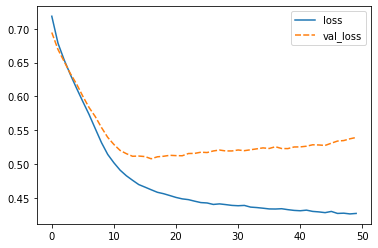

In [22]:
sns.lineplot(data=(his_df["loss"],his_df["val_loss"]))

<AxesSubplot:>

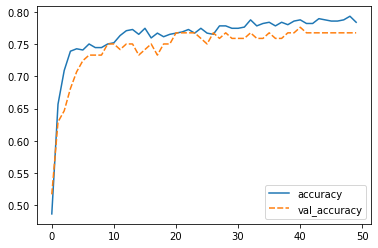

In [23]:
sns.lineplot(data=(his_df["accuracy"],his_df["val_accuracy"]))

In [24]:
max_val_acc = max(model_history.history["val_accuracy"])
print("The best accuracy on the validation set: ",max_val_acc)
index = (model_history.history["val_accuracy"]).index(max_val_acc)
print("Epoch: ",index)

The best accuracy on the validation set:  0.7758620977401733
Epoch:  40


In [25]:
y_pred = (model.predict(X_valid) > 0.5).astype("int32")
print(classification_report(Y_valid, y_pred))

              precision    recall  f1-score   support

           0       0.77      0.91      0.83        74
           1       0.76      0.52      0.62        42

    accuracy                           0.77       116
   macro avg       0.76      0.71      0.73       116
weighted avg       0.77      0.77      0.76       116



### Report results using nice ROC curves, report AUC values. Feel free to use code form our course, or from elsewhere

Text(51.0, 0.5, 'Predicted')

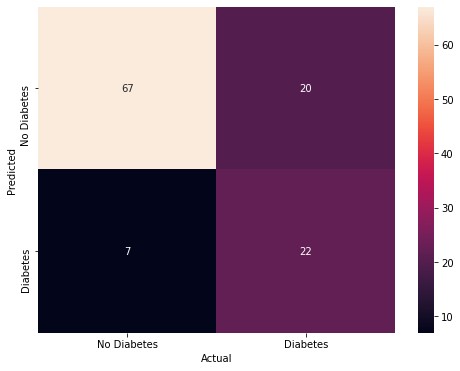

In [26]:
c_mat = confusion_matrix(Y_valid, y_pred)
c_mat_df = pd.DataFrame(c_mat)
c_mat_df.columns = ['No Diabetes', 'Diabetes']
c_mat_df.index = ['No Diabetes', 'Diabetes']
c_mat_df = c_mat_df.T
plt.figure(figsize = (8,6))
sns.heatmap(c_mat_df,annot = True,fmt = 'g')
plt.xlabel("Actual")
plt.ylabel("Predicted")

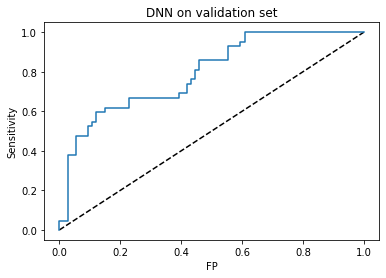

In [27]:
'''Receiver Operator Curve (ROC) and Area under the curve (AUC)'''
fpr, tpr, thresholds = roc_curve(Y_valid, model.predict(X_valid))
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr, tpr, label='DNN')
plt.xlabel('FP')
plt.ylabel('Sensitivity')
plt.title('DNN on validation set')
plt.show()

In [28]:
roc_auc_score(Y_valid,y_pred)

0.7146074646074645

### Check the accuracy on Test set

In [29]:
acc= model.evaluate(X_test,Y_test)

4/4 [==============================] - 0s 506us/step - loss: 0.5253 - accuracy: 0.7759


In [30]:
y_test_pred = (model.predict(X_test) > 0.5).astype("int32")
print(classification_report(Y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.83      0.83      0.83        75
           1       0.68      0.68      0.68        41

    accuracy                           0.78       116
   macro avg       0.75      0.75      0.75       116
weighted avg       0.78      0.78      0.78       116



Text(51.0, 0.5, 'Predicted')

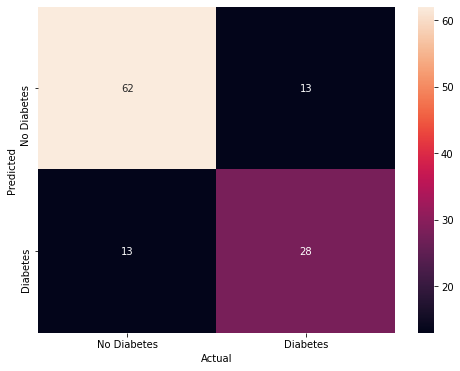

In [31]:
c_mat = confusion_matrix(Y_test, y_test_pred)
c_mat_df = pd.DataFrame(c_mat)
c_mat_df.columns = ['No Diabetes', 'Diabetes']
c_mat_df.index = ['No Diabetes', 'Diabetes']
c_mat_df = c_mat_df.T
plt.figure(figsize = (8,6))
sns.heatmap(c_mat_df,annot = True,fmt = 'g')
plt.xlabel("Actual")
plt.ylabel("Predicted")

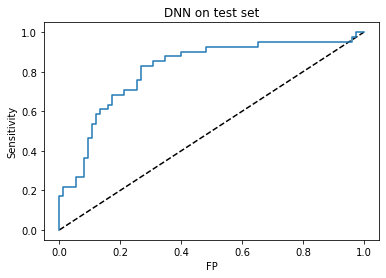

In [32]:
'''Receiver Operator Curve (ROC) and Area under the curve (AUC)'''
fpr, tpr, thresholds = roc_curve(Y_test, model.predict(X_test))
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr, tpr, label='DNN')
plt.xlabel('FP')
plt.ylabel('Sensitivity')
plt.title('DNN on test set')
plt.show()

In [33]:
roc_auc_score(Y_test, y_test_pred)

0.7547967479674798

In [34]:
conclusion["DNN"] = acc[1]

### How would you increase dataset size? Try out at least two approaches and re-evaluate the model performance on this new and augmented dataset.

In [35]:
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


1.Upsampling 

In [36]:
df_y = df["Outcome"]
df_x = df.drop("Outcome", axis=1)

In [37]:
from imblearn.over_sampling import SMOTE

In [38]:
scaler = preprocessing.StandardScaler()
df_x =pd.DataFrame(scaler.fit_transform(df_x))
df_x.columns = ["Pregnancies","Glucose","BloodPressure","SkinThickness","Insulin","BMI","DiabetesPedigreeFunction","Age"]

In [39]:
(X_train_valid, X_test, Y_train_valid, Y_test) = train_test_split(df_x, df_y, test_size=0.15, random_state=1)
(X_train, X_valid, Y_train, Y_valid) = train_test_split(X_train_valid,Y_train_valid, test_size=(X_test.shape[0]/X_train_valid.shape[0]), random_state=1)

In [40]:
print(X_train.shape,X_valid.shape,X_test.shape)

(536, 8) (116, 8) (116, 8)


In [41]:
print("Before UpSampling")
print(Counter(Y_train))
sm = SMOTE(sampling_strategy = 1 ,k_neighbors = 5, random_state=1) 
X_train_res, y_train_res = sm.fit_sample(X_train, Y_train.ravel())
print("After UpSampling")
print(Counter(y_train_res))

Before UpSampling
Counter({0: 351, 1: 185})
After UpSampling
Counter({0: 351, 1: 351})


In [42]:
X_train_res

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,-1.141852,0.159787,0.873409,0.405445,0.349057,-0.582887,0.130239,-1.041549
1,-1.141852,0.410164,-0.574128,-0.033651,1.833832,-0.709806,-0.362041,-1.041549
2,0.342981,-0.372265,0.304734,0.342717,-0.692891,0.508619,0.223862,2.276873
3,-1.141852,2.413181,-0.160546,0.719086,1.686223,1.181291,0.090977,-0.445935
4,0.936914,-0.497453,-3.572597,-1.288212,-0.692891,-4.060474,-0.503986,-0.786286
...,...,...,...,...,...,...,...,...
697,0.639947,1.186096,-0.168348,-1.288212,-0.692891,-0.835208,-0.887541,1.425995
698,-0.245366,0.330449,0.072580,-1.288212,-0.692891,-0.434532,0.077935,-0.741341
699,-1.141852,-0.442582,-0.358832,0.629747,-0.057498,0.553451,0.799748,-0.722195
700,-0.000834,1.905899,0.345648,1.138391,1.641043,0.585483,-0.583978,-0.204095


In [43]:
model = Sequential()
model.add(Dense(15, input_dim=X_train_res.shape[1], activation='relu'))
model.add(Dense(6, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [44]:
model.fit(X_train_res,  y_train_res, validation_data=(X_valid, Y_valid),epochs=50, batch_size=5)

Epoch 1/50
141/141 [==============================] - 0s 1ms/step - loss: 0.6689 - accuracy: 0.5655 - val_loss: 0.6459 - val_accuracy: 0.5603
Epoch 2/50
141/141 [==============================] - 0s 566us/step - loss: 0.5835 - accuracy: 0.7165 - val_loss: 0.5989 - val_accuracy: 0.6466
Epoch 3/50
141/141 [==============================] - 0s 615us/step - loss: 0.5322 - accuracy: 0.7450 - val_loss: 0.5762 - val_accuracy: 0.6638
Epoch 4/50
141/141 [==============================] - 0s 587us/step - loss: 0.5081 - accuracy: 0.7407 - val_loss: 0.5678 - val_accuracy: 0.6552
Epoch 5/50
141/141 [==============================] - 0s 580us/step - loss: 0.4972 - accuracy: 0.7507 - val_loss: 0.5592 - val_accuracy: 0.6552
Epoch 6/50
141/141 [==============================] - 0s 799us/step - loss: 0.4908 - accuracy: 0.7507 - val_loss: 0.5577 - val_accuracy: 0.6724
Epoch 7/50
141/141 [==============================] - 0s 601us/step - loss: 0.4861 - accuracy: 0.7621 - val_loss: 0.5551 - val_accuracy: 0

In [45]:
y_pred = (model.predict(X_valid) > 0.5).astype("int32")
print(classification_report(Y_valid, y_pred))

              precision    recall  f1-score   support

           0       0.81      0.85      0.83        74
           1       0.71      0.64      0.67        42

    accuracy                           0.78       116
   macro avg       0.76      0.75      0.75       116
weighted avg       0.77      0.78      0.77       116



Text(51.0, 0.5, 'Predicted')

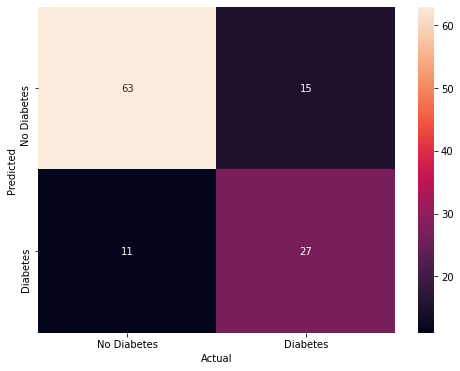

In [46]:
c_mat = confusion_matrix(Y_valid, y_pred)
c_mat_df = pd.DataFrame(c_mat)
c_mat_df.columns = ['No Diabetes', 'Diabetes']
c_mat_df.index = ['No Diabetes', 'Diabetes']
c_mat_df = c_mat_df.T
plt.figure(figsize = (8,6))
sns.heatmap(c_mat_df,annot = True,fmt = 'g')
plt.xlabel("Actual")
plt.ylabel("Predicted")

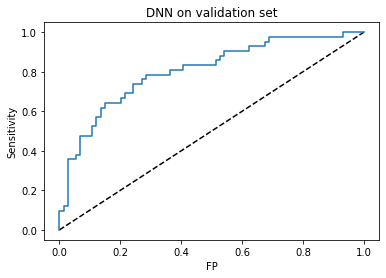

In [47]:
'''Receiver Operator Curve (ROC) and Area under the curve (AUC)'''
fpr, tpr, thresholds = roc_curve(Y_valid, model.predict(X_valid))
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr, tpr, label='DNN')
plt.xlabel('FP')
plt.ylabel('Sensitivity')
plt.title('DNN on validation set after upsampling')
plt.show()

In [48]:
acc = model.evaluate(X_test,Y_test)

4/4 [==============================] - 0s 739us/step - loss: 0.5275 - accuracy: 0.7328


In [49]:
y_test_pred = (model.predict(X_test) > 0.5).astype("int32")
print(classification_report(Y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.83      0.73      0.78        75
           1       0.60      0.73      0.66        41

    accuracy                           0.73       116
   macro avg       0.72      0.73      0.72       116
weighted avg       0.75      0.73      0.74       116



Text(51.0, 0.5, 'Predicted')

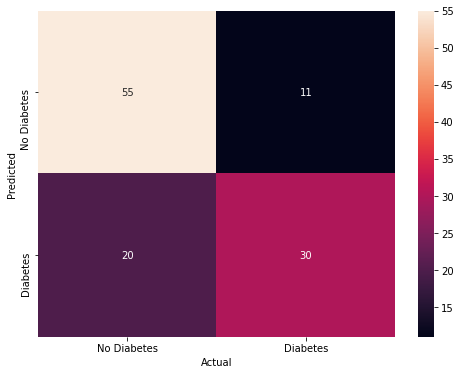

In [50]:
c_mat = confusion_matrix(Y_test, y_test_pred)
c_mat_df = pd.DataFrame(c_mat)
c_mat_df.columns = ['No Diabetes', 'Diabetes']
c_mat_df.index = ['No Diabetes', 'Diabetes']
c_mat_df = c_mat_df.T
plt.figure(figsize = (8,6))
sns.heatmap(c_mat_df,annot = True,fmt = 'g')
plt.xlabel("Actual")
plt.ylabel("Predicted")

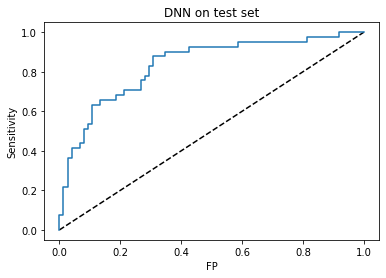

In [51]:
'''Receiver Operator Curve (ROC) and Area under the curve (AUC)'''
fpr, tpr, thresholds = roc_curve(Y_test, model.predict(X_test))
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr, tpr, label='DNN')
plt.xlabel('FP')
plt.ylabel('Sensitivity')
plt.title('DNN on test set after upsampling')
plt.show()

In [52]:
roc_auc_score(Y_test, y_test_pred)

0.732520325203252

In [53]:
conclusion["DNN-UpSampling"] = acc[1]

2. Downsampling

In [54]:
df_y = df["Outcome"]
df_x = df.drop("Outcome", axis=1)

In [55]:
from imblearn.under_sampling import RandomUnderSampler

In [56]:
Counter(df_y)

Counter({1: 268, 0: 500})

In [57]:
scaler = preprocessing.StandardScaler()
df_x =pd.DataFrame(scaler.fit_transform(df_x))
df_x.columns = ["Pregnancies","Glucose","BloodPressure","SkinThickness","Insulin","BMI","DiabetesPedigreeFunction","Age"]

In [58]:
(X_train_valid, X_test, Y_train_valid, Y_test) = train_test_split(df_x, df_y, test_size=0.15, random_state=1)
(X_train, X_valid, Y_train, Y_valid) = train_test_split(X_train_valid,Y_train_valid, test_size=(X_test.shape[0]/X_train_valid.shape[0]), random_state=1)

In [59]:
print(X_train.shape,Y_train.shape)
print(X_valid.shape,Y_valid.shape)
print(X_test.shape,Y_test.shape)

(536, 8) (536,)
(116, 8) (116,)
(116, 8) (116,)


In [60]:
print("Before DownSampling")
print(Counter(Y_train))
rus = RandomUnderSampler()
X_train_ds, Y_train_ds = rus.fit_resample(X_train, Y_train)
print("After DownSampling")
print(Counter(Y_train_ds))

Before DownSampling
Counter({0: 351, 1: 185})
After DownSampling
Counter({0: 185, 1: 185})


In [61]:
X_train_ds

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,-1.141852,-0.747831,-0.263941,0.969998,0.175399,0.610154,0.386949,-0.701198
1,-0.844885,-0.059293,-1.297896,1.660007,-0.145868,0.445159,-0.579489,-0.701198
2,0.342981,-1.498962,-0.470732,-1.288212,-0.692891,-0.659038,-0.615731,-0.531023
3,-0.844885,-1.279882,0.253036,-0.598204,-0.171917,-0.252897,0.166480,-0.956462
4,-0.250952,-0.153185,-3.572597,-1.288212,-0.692891,-1.077872,-0.860360,-0.871374
...,...,...,...,...,...,...,...,...
365,0.936914,-0.560048,-0.160546,0.719086,-0.692891,0.902069,-0.386202,-0.190672
366,-0.844885,2.350587,0.356432,0.969998,1.469151,0.572079,1.217481,-0.360847
367,-0.844885,0.222381,-1.091105,1.534551,0.991591,1.079756,0.426210,-0.786286
368,-1.141852,-0.497453,0.770014,-1.288212,-0.692891,-0.519427,0.812786,2.447048


In [62]:
model = Sequential()
model.add(Dense(15, input_dim=X_train_ds.shape[1], activation='relu'))
model.add(Dense(6, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [63]:
model.fit(X_train_ds, Y_train_ds, validation_data=(X_valid, Y_valid),epochs=50, batch_size=5)

Epoch 1/50
74/74 [==============================] - 0s 2ms/step - loss: 0.6998 - accuracy: 0.5243 - val_loss: 0.6926 - val_accuracy: 0.5000
Epoch 2/50
74/74 [==============================] - 0s 633us/step - loss: 0.6600 - accuracy: 0.6541 - val_loss: 0.6636 - val_accuracy: 0.5862
Epoch 3/50
74/74 [==============================] - 0s 674us/step - loss: 0.6180 - accuracy: 0.7189 - val_loss: 0.6355 - val_accuracy: 0.6034
Epoch 4/50
74/74 [==============================] - 0s 660us/step - loss: 0.5745 - accuracy: 0.7568 - val_loss: 0.6049 - val_accuracy: 0.6466
Epoch 5/50
74/74 [==============================] - 0s 674us/step - loss: 0.5372 - accuracy: 0.7595 - val_loss: 0.5799 - val_accuracy: 0.6897
Epoch 6/50
74/74 [==============================] - 0s 1ms/step - loss: 0.5124 - accuracy: 0.7730 - val_loss: 0.5616 - val_accuracy: 0.6810
Epoch 7/50
74/74 [==============================] - 0s 741us/step - loss: 0.4975 - accuracy: 0.7676 - val_loss: 0.5471 - val_accuracy: 0.6724
Epoch 8/50

In [64]:
y_pred = (model.predict(X_valid) > 0.5).astype("int32")
print(classification_report(Y_valid, y_pred))

              precision    recall  f1-score   support

           0       0.80      0.72      0.76        74
           1       0.58      0.69      0.63        42

    accuracy                           0.71       116
   macro avg       0.69      0.70      0.69       116
weighted avg       0.72      0.71      0.71       116



Text(51.0, 0.5, 'Predicted')

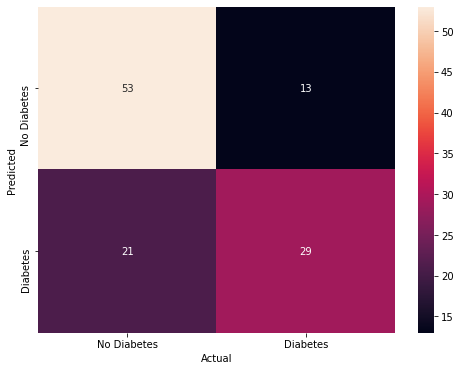

In [65]:
c_mat = confusion_matrix(Y_valid, y_pred)
c_mat_df = pd.DataFrame(c_mat)
c_mat_df.columns = ['No Diabetes', 'Diabetes']
c_mat_df.index = ['No Diabetes', 'Diabetes']
c_mat_df = c_mat_df.T
plt.figure(figsize = (8,6))
sns.heatmap(c_mat_df,annot = True,fmt = 'g')
plt.xlabel("Actual")
plt.ylabel("Predicted")

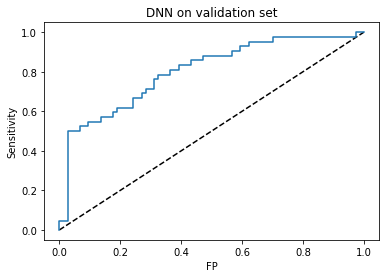

In [66]:
'''Receiver Operator Curve (ROC) and Area under the curve (AUC)'''
fpr, tpr, thresholds = roc_curve(Y_valid, model.predict(X_valid))
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr, tpr, label='DNN')
plt.xlabel('FP')
plt.ylabel('Sensitivity')
plt.title('DNN on validation set after downsampling')
plt.show()

In [67]:
acc = model.evaluate(X_test,Y_test)

4/4 [==============================] - 0s 748us/step - loss: 0.4981 - accuracy: 0.7586


In [68]:
y_test_pred = (model.predict(X_test) > 0.5).astype("int32")
print(classification_report(Y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.85      0.76      0.80        75
           1       0.63      0.76      0.69        41

    accuracy                           0.76       116
   macro avg       0.74      0.76      0.75       116
weighted avg       0.77      0.76      0.76       116



Text(51.0, 0.5, 'Predicted')

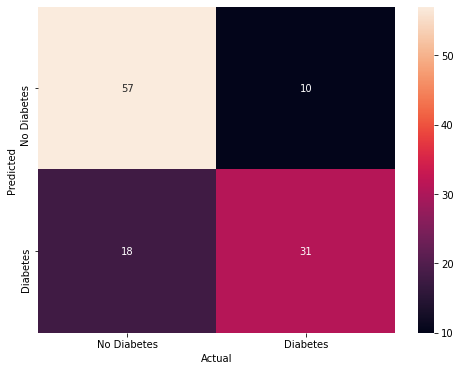

In [69]:
c_mat = confusion_matrix(Y_test, y_test_pred)
c_mat_df = pd.DataFrame(c_mat)
c_mat_df.columns = ['No Diabetes', 'Diabetes']
c_mat_df.index = ['No Diabetes', 'Diabetes']
c_mat_df = c_mat_df.T
plt.figure(figsize = (8,6))
sns.heatmap(c_mat_df,annot = True,fmt = 'g')
plt.xlabel("Actual")
plt.ylabel("Predicted")

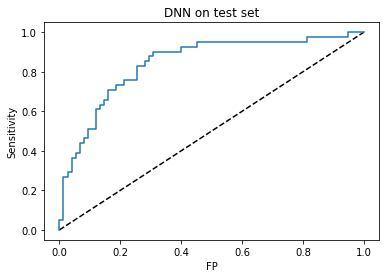

In [70]:
'''Receiver Operator Curve (ROC) and Area under the curve (AUC)'''
fpr, tpr, thresholds = roc_curve(Y_test, model.predict(X_test))
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr, tpr, label='DNN')
plt.xlabel('FP')
plt.ylabel('Sensitivity')
plt.title('DNN on test set after downsampling')
plt.show()

In [71]:
roc_auc_score(Y_test, y_test_pred)

0.7580487804878049

In [72]:
conclusion["DNN-DownSampling"] = acc[1]

### Conclusion - Result Comparisons

In [75]:
conclusion

{'DNN': 0.7758620977401733,
 'DNN-UpSampling': 0.732758641242981,
 'DNN-DownSampling': 0.7586206793785095}

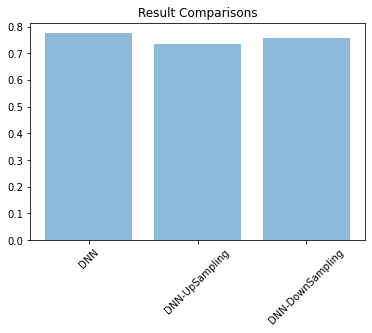

In [74]:
plt.bar(conclusion.keys(), conclusion.values(), align='center', alpha=0.5)
plt.xticks(rotation=45)
plt.title('Result Comparisons')

plt.show()